- https://github.com/felipeeeantunes/udacity_live/blob/master/porto_seguro.ipynb
- https://www.kaggle.com/c/santander-customer-satisfaction/

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [290]:
pd.options.display.float_format = '{:.2f}'.format

rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': (15,5), 'axes.labelsize': 16,\
   'axes.titlesize': 16, 'font.size': 16, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 16,\
   'xtick.labelsize': 14, 'ytick.labelsize': 14, 'xtick.direction':'in'}
sns.set(style='darkgrid',rc=rc);

plt.figure(figsize=(15,5));

<Figure size 1080x360 with 0 Axes>

In [47]:
def cfg_plot(title='', xlabel='', ylabel='', rotation=0):
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [2]:
df = pd.read_csv('train.csv')

# Target analysis

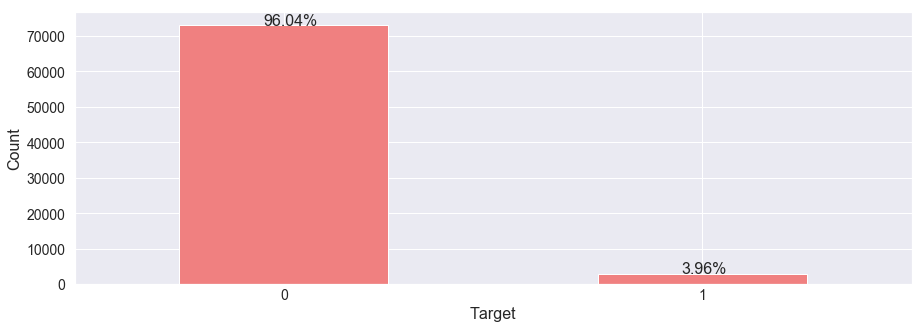

In [291]:
ax = df.TARGET.value_counts().plot(kind='bar', color='lightcoral')

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df['TARGET'])), (p.get_x()+ 0.2, p.get_height()))

cfg_plot('', 'Target', 'Count')

# Feature analysis

In [4]:
"""
Get min-max to produce get_meta() function.
Knows max/min helps to identify categorical/numerical features.
For example, features starts with 'ind_var' are categorical(binary).

Another way to do this would be use value_counts() and identify features
that have only two different values.
"""

for col in df.columns:
    print('[{0}][{1}] max:{2} --- min:{3}'.format(col, str(df[col].dtype), df[col].min(),df[col].max()))

[ID][int64] max:1 --- min:151838
[var3][int64] max:-999999 --- min:238
[var15][int64] max:5 --- min:105
[imp_ent_var16_ult1][float64] max:0.0 --- min:210000.0
[imp_op_var39_comer_ult1][float64] max:0.0 --- min:12888.03
[imp_op_var39_comer_ult3][float64] max:0.0 --- min:21024.81
[imp_op_var40_comer_ult1][float64] max:0.0 --- min:8237.82
[imp_op_var40_comer_ult3][float64] max:0.0 --- min:11073.57
[imp_op_var40_efect_ult1][float64] max:0.0 --- min:6600.0
[imp_op_var40_efect_ult3][float64] max:0.0 --- min:6600.0
[imp_op_var40_ult1][float64] max:0.0 --- min:8237.82
[imp_op_var41_comer_ult1][float64] max:0.0 --- min:12888.03
[imp_op_var41_comer_ult3][float64] max:0.0 --- min:16566.81
[imp_op_var41_efect_ult1][float64] max:0.0 --- min:45990.0
[imp_op_var41_efect_ult3][float64] max:0.0 --- min:131100.0
[imp_op_var41_ult1][float64] max:0.0 --- min:47598.09
[imp_op_var39_efect_ult1][float64] max:0.0 --- min:45990.0
[imp_op_var39_efect_ult3][float64] max:0.0 --- min:131100.0
[imp_op_var39_ult1][f

[num_meses_var39_vig_ult3][int64] max:0 --- min:3
[num_meses_var44_ult3][int64] max:0 --- min:3
[num_op_var39_comer_ult1][int64] max:0 --- min:438
[num_op_var39_comer_ult3][int64] max:0 --- min:600
[num_op_var40_comer_ult1][int64] max:0 --- min:210
[num_op_var40_comer_ult3][int64] max:0 --- min:582
[num_op_var40_efect_ult1][int64] max:0 --- min:24
[num_op_var40_efect_ult3][int64] max:0 --- min:24
[num_op_var41_comer_ult1][int64] max:0 --- min:438
[num_op_var41_comer_ult3][int64] max:0 --- min:438
[num_op_var41_efect_ult1][int64] max:0 --- min:90
[num_op_var41_efect_ult3][int64] max:0 --- min:156
[num_op_var39_efect_ult1][int64] max:0 --- min:90
[num_op_var39_efect_ult3][int64] max:0 --- min:156
[num_reemb_var13_hace3][int64] max:0 --- min:0
[num_reemb_var13_ult1][int64] max:0 --- min:3
[num_reemb_var17_hace3][int64] max:0 --- min:3
[num_reemb_var17_ult1][int64] max:0 --- min:21
[num_reemb_var33_hace3][int64] max:0 --- min:0
[num_reemb_var33_ult1][int64] max:0 --- min:3
[num_sal_var16_u

In [5]:
"""
Organizing dataframe in 4 attributes:
- role
- level
- keep
- dtype

Will be util when categorical and numerical data used.
"""

def get_meta(train):
    data=[]
    for col in train.columns:
        # role
        if col=='TARGET':
            role='target'
        elif col=='ID':
            role='id'
        else:
            role='input'
            
        # level - identified in behind cell
        if 'ind_var' in col or col == 'TARGET':
            level='binary'
        elif col=='ID':
            level='nominal'
        elif train[col].dtype == np.float64: # float64 are numeric
            level = 'interval'
        elif train[col].dtype == np.int64:  # int64 are categorical
            level = 'ordinal'  
    
        # keep
        keep = True
        if col == 'ID':
            keep = False
            
        # data type 
        dtype = train[col].dtype
        
        col_dict={
            'varname': col,
            'role'   :role,
            'level'  :level,
            'keep'   :keep,
            'dtype'  :dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    
    return meta

In [72]:
meta_data = get_meta(df)

In [315]:
meta_data.head()

,role,level,keep,dtype
varname,,,,
ID,id,nominal,False,int64
var3,input,ordinal,True,int64
var15,input,ordinal,True,int64
imp_ent_var16_ult1,input,interval,True,float64
imp_op_var39_comer_ult1,input,interval,True,float64


In [26]:
"""
Counting dtype grouping by role and level.
"""
meta_data.groupby(['role','level']).agg({'dtype': lambda x: x.count()})

dtype
role   level          
id     nominal       1
input  binary       75
       interval    111
       ordinal     183
target binary        1

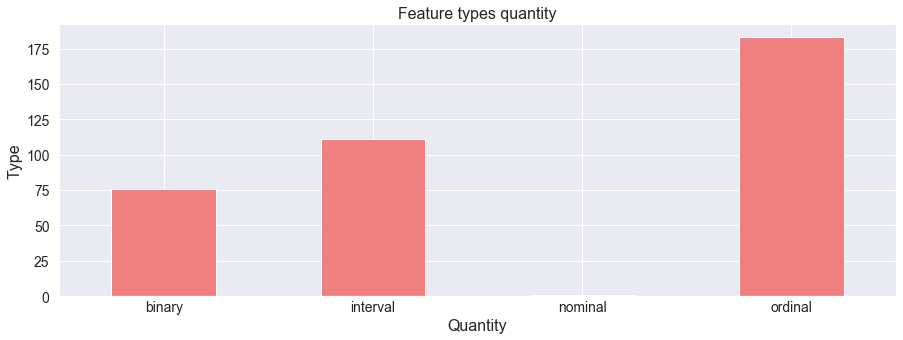

In [292]:
meta_data.groupby('level')['dtype'].count().plot(kind='bar', color='lightcoral')

cfg_plot('Feature types quantity', 'Quantity', 'Type')

In [27]:
"""
Counting missing values
"""

is_null = df.isnull().sum()
is_null[is_null>0]

Series([], dtype: int64)

In [78]:
"""
No missing values? Second check:
"""

for col in df.columns:
    qtd = df.ID.isna().sum()
    if qtd>0:
        print('{0}: {1} missing values'.format(col, qtd))

Yeap. There no are missing values in this dataset!

## Filtering by level

In [89]:
meta_data

,role,level,keep,dtype
varname,,,,
ID,id,nominal,False,int64
var3,input,ordinal,True,int64
var15,input,ordinal,True,int64
imp_ent_var16_ult1,input,interval,True,float64
imp_op_var39_comer_ult1,input,interval,True,float64
imp_op_var39_comer_ult3,input,interval,True,float64
imp_op_var40_comer_ult1,input,interval,True,float64
imp_op_var40_comer_ult3,input,interval,True,float64
imp_op_var40_efect_ult1,input,interval,True,float64


In [97]:
col_ordinal = sorted(meta_data[(meta_data['level']=='ordinal') & (meta_data['keep'])].index)
col_nominal = sorted(meta_data[(meta_data['level']=='nominal') & (meta_data['keep'])].index)
col_interval = sorted(meta_data[(meta_data['level']=='interval') & (meta_data['keep'])].index)
col_binary = sorted(meta_data[(meta_data['level']=='binary') & (meta_data['keep'])].index)

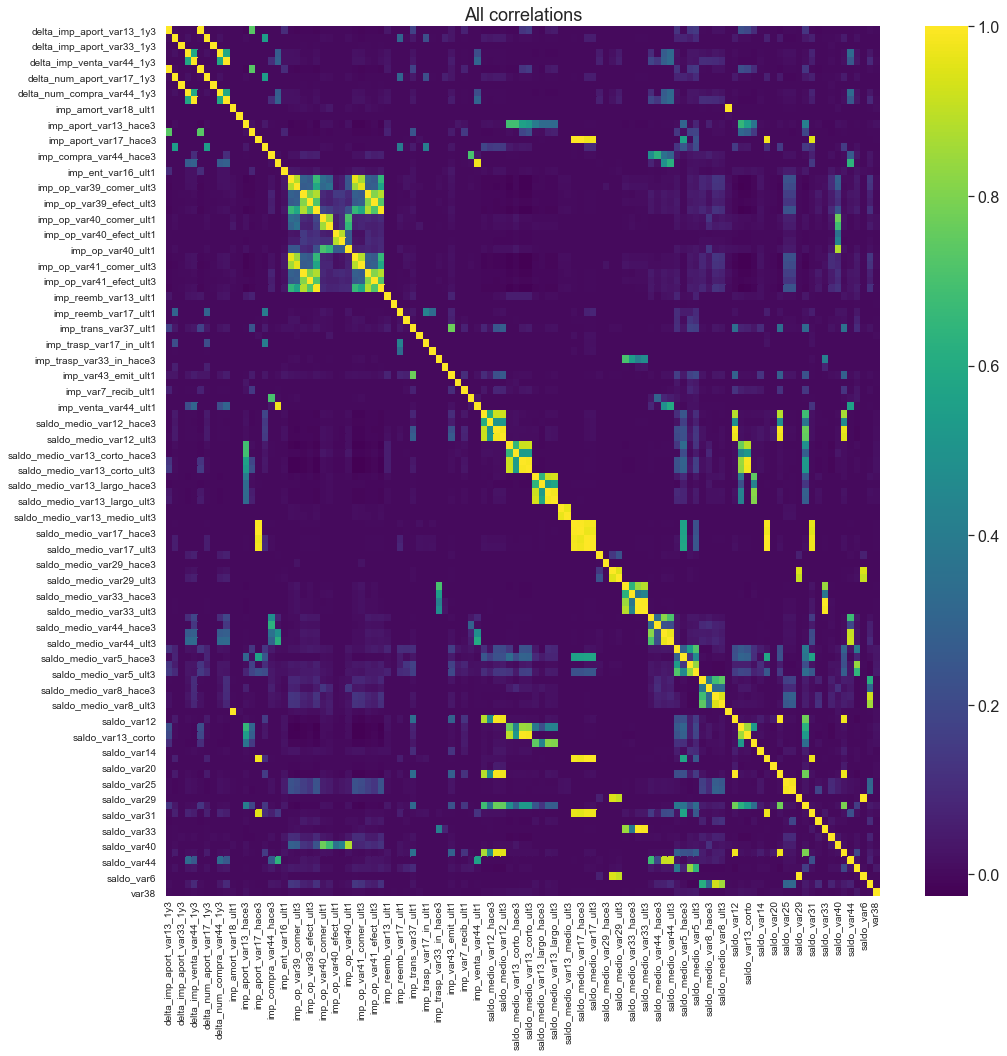

In [265]:
plt.figure(figsize=(16,16))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(df[col_interval].corr(), cmap='viridis')
cfg_plot('All correlations', rotation=90)

In [240]:
"""
- Breaking dataframe in series
- Removing auto correlation
- Filtering with correlations > 0.5 and sorting values by correlation
- Add column with sorted level_0 and level_1 merged as str
    - This is necessary to remove level_0: aaa, level_1: bbb; level_0: bbb, level_1: aaa, for example.
    - Apply drop_duplicates() after apply function don't work correctly. Compare columns in df works great.
- Applying drop_duplicates() in pandas df and drop aux column aggstr
"""

corr = df[col_interval].corr().stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr = corr[corr > 0.7].reset_index().sort_values(by=0, ascending=False)
corr['aggstr'] = corr.apply(lambda x: str(sorted([x.level_0, x.level_1])), axis=1)
corr = corr.drop_duplicates(subset='aggstr').sort_values(by=0, ascending=False).drop('aggstr', axis=1)

In [260]:
"""
Showing a sample of strong correlations
"""
corr.head()

,level_0,level_1,0
0,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,1.00
5,delta_imp_venta_var44_1y3,delta_num_venta_var44_1y3,1.00
211,saldo_var29,saldo_var6,1.00
2,delta_imp_aport_var17_1y3,delta_num_aport_var17_1y3,1.00
3,delta_imp_aport_var33_1y3,delta_num_aport_var33_1y3,1.00


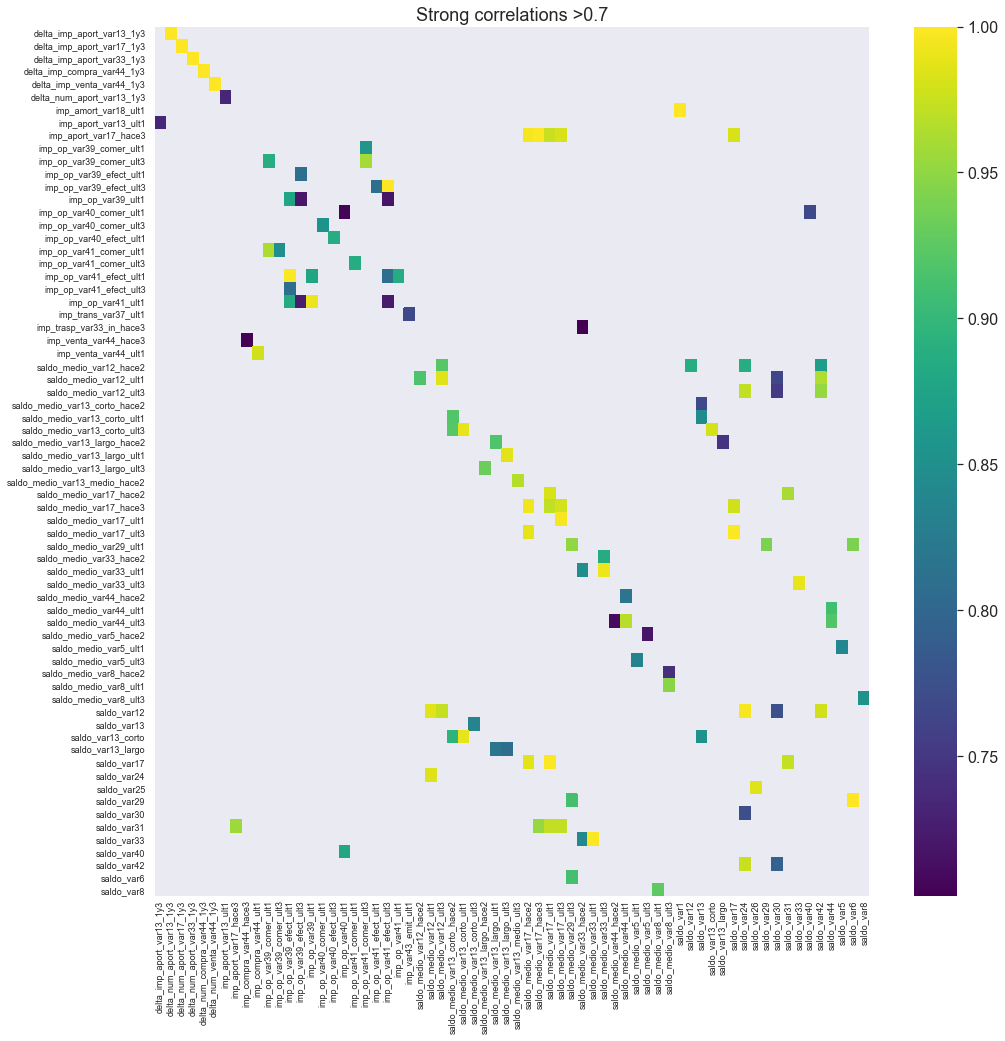

In [264]:
"""
Generating pivot table from strong correlations (>0.7) and crate heatmap
"""
plt.figure(figsize=(16,16))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

sns.heatmap(corr.pivot(index='level_0', columns='level_1', values=0), cmap='viridis')

cfg_plot('Strong correlations >0.7', rotation=90)

#### Removing columns

In [274]:
df_ = df.drop('ID', axis=1)

#### Feature importances

In [283]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=99)
rf.fit(df_.drop('TARGET', axis=1), df_.TARGET)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=99, verbose=0, warm_start=False)

In [284]:
def get_feature_importances(columns, importances, qtd=30):
    imp_dict = dict(zip(columns, importances))
    
    return pd.DataFrame.from_dict(imp_dict, orient='index', columns=['importance']).sort_values('importance', ascending=False)[:qtd]

In [311]:
feat_imp = get_feature_importances(df.drop('TARGET', axis=1).columns.values, rf.feature_importances_, 15)

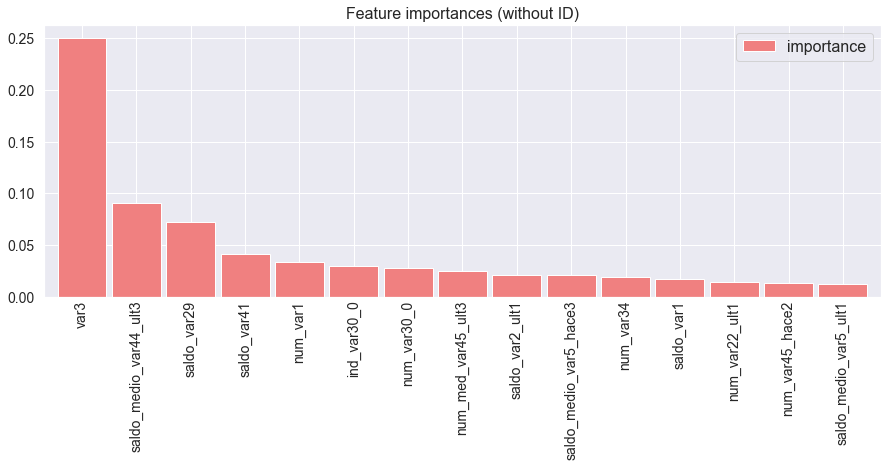

In [314]:
feat_imp.plot(kind='bar', color='lightcoral', width=0.9)

cfg_plot('Feature importances (without ID)', rotation=90)

#### Base models

All features

In [32]:
def cross_val_model(x, y, model):
    x = np.array(x)
    y = np.array(y)
    
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=99) # return index of x,y
    
    for i, (t1_index, t2_index) in enumerate(skf.split(x, y)):
        xt1, xt2 = x[t1_index], x[t2_index]
        yt1, yt2 = y[t1_index], y[t2_index]
        
        print ("Fit %s fold %d" % (str(model).split('(')[0], i))
        model.fit(xt1, yt1)
        cross_score = cross_val_score(model, xt2, yt2, cv=3, scoring='roc_auc')
        print("    cross_score: %.5f" % cross_score.mean())

In [33]:
x = df.drop('TARGET', axis=1)
y = df.TARGET

#### Logistic regression

In [34]:
lr_model = LogisticRegression(random_state=99, class_weight='balanced')

cross_val_model(x,y,lr_model)

Fit LogisticRegression fold 0
    cross_score: 0.66193
Fit LogisticRegression fold 1
    cross_score: 0.69420
Fit LogisticRegression fold 2
    cross_score: 0.68031


#### Random forest

In [35]:
#RandomForest params
rf_params = {}
rf_params['n_estimators'] = 200
rf_params['max_depth'] = 6
rf_params['min_samples_split'] = 70
rf_params['min_samples_leaf'] = 30

rf_model = RandomForestClassifier(**rf_params)

In [36]:
cross_val_model(x, y, rf_model)

Fit RandomForestClassifier fold 0
    cross_score: 0.80147
Fit RandomForestClassifier fold 1
    cross_score: 0.80554
Fit RandomForestClassifier fold 2
    cross_score: 0.78530


#### Selecting features

In [18]:
"""
Testing with k best features
"""
for n_feat in [5, 10, 15, 20, 25, 30]:  
    lst_feat = get_feature_importances(df.drop('TARGET', axis=1).columns.values, rf.feature_importances_, n_feat).index.values

    x = df[lst_feat]
    y = df.TARGET
    
    print('----- '+str(n_feat)+' best features ----\n')
    cross_val_model(x, y, rf_model)
    print('\n')

----- 5 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.82052
Fit RandomForestClassifier fold 1
    cross_score: 0.83184
Fit RandomForestClassifier fold 2
    cross_score: 0.81435


----- 10 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81833
Fit RandomForestClassifier fold 1
    cross_score: 0.83100
Fit RandomForestClassifier fold 2
    cross_score: 0.81454


----- 15 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81577
Fit RandomForestClassifier fold 1
    cross_score: 0.82474
Fit RandomForestClassifier fold 2
    cross_score: 0.80833


----- 20 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81817
Fit RandomForestClassifier fold 1
    cross_score: 0.82551
Fit RandomForestClassifier fold 2
    cross_score: 0.80783


----- 25 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81926
Fit RandomForestClassifier fold 1
    cross_score: 0.82637
Fit RandomForestClassi

#### All features One hot encoding

In [37]:
def one_hot_encoder(df, one_hot, limit):
    df_ = df.copy()
    for c in one_hot:
        if len(one_hot[c])>2 and len(one_hot[c]) < limit:
            for val in one_hot[c]:
                df_[c+'_oh_' + str(val)] = (df_[c].values == val).astype(np.int)
    return df_

In [38]:
one_hot = {c: list(df[c].unique()) for c in df.columns if c not in ['TARGET']}

In [39]:
df_ohe = one_hot_encoder(df, one_hot, 7)

In [40]:
x = df_ohe.drop('TARGET', axis=1)
y = df_ohe.TARGET
cross_val_model(x, y, rf_model)

Fit RandomForestClassifier fold 0
    cross_score: 0.79598
Fit RandomForestClassifier fold 1
    cross_score: 0.80130
Fit RandomForestClassifier fold 2
    cross_score: 0.78011


#### Select best with ohe

In [42]:
"""
Testing with k best features
"""
for n_feat in [5, 10, 15, 20, 25, 30]:  
    lst_feat = get_feature_importances(df.drop('TARGET', axis=1).columns.values, rf.feature_importances_, n_feat).index.values
    
    df_ = df[lst_feat]
    one_hot = {c: list(df_[c].unique()) for c in df_.columns if c not in ['TARGET']}
    df_ohe = one_hot_encoder(df_, one_hot, 7)
    
    x = df_ohe
    y = df.TARGET

    print('----- '+str(n_feat)+' best features ----\n')
    cross_val_model(x, y, rf_model)
    print('\n')

----- 5 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.82067
Fit RandomForestClassifier fold 1
    cross_score: 0.83187
Fit RandomForestClassifier fold 2
    cross_score: 0.81381


----- 10 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81229
Fit RandomForestClassifier fold 1
    cross_score: 0.82308
Fit RandomForestClassifier fold 2
    cross_score: 0.80491


----- 15 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81601
Fit RandomForestClassifier fold 1
    cross_score: 0.82489
Fit RandomForestClassifier fold 2
    cross_score: 0.80824


----- 20 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81438
Fit RandomForestClassifier fold 1
    cross_score: 0.82511
Fit RandomForestClassifier fold 2
    cross_score: 0.80576


----- 25 best features ----

Fit RandomForestClassifier fold 0
    cross_score: 0.81374
Fit RandomForestClassifier fold 1
    cross_score: 0.81951
Fit RandomForestClassi